# **PROYECTO**:

El objetivo de este proyecto es que trabajéis todo lo aprendido, pudiendo  aplicar las distintas fases necesarias para poder realizar todo el pipeline presentado. Por ello el  proyecto es abierto, a diferencia de los ejercicios realizados no hay una solución para cada  opción que os daré, sino que tenéis libre elección para hacer todo lo que queráis/consideréis.  Por esta razón la base de datos que podéis usar puede ser una vuestra1, de un área que os  interese, o puede ser una de las que os propondré yo. A pesar de ser un proyecto abierto hay  una serie de requisitos a cumplir.  

Requisitos  

- Procesado datos: Transmitir la información que nos da la base de datos a partir de la  comprensión que hacéis mirando las distintas variables. Por ejemplo: observar si hay  algún bias… mostrar los distintos valores de una columna (nos sirve para establecer si  es coherente o no…)  

Trabajar con los valores nulos  

- Reducción de la dimensionalidad: ¿Es factible? ¿Sí? ¿No? Explicar porqué y realizarlo  en caso de ser así.  

- Clustering: ¿Podemos enriquecer nuestros datos a partir del clustering, podemos hacer  data aggregation?  

- Algoritmos:  

o Entrenar

o Métricas

o Explicabilidad

En todas las situaciones se considera que lo importante es que en caso de que no podéis realizar  alguna etapa, argumentar porqué es así. Lo que más se tendrá en cuenta será el proceso lógico  que habéis seguido y las explicaciones dadas.

1 El único requisito es que debe contener valores nulos.  

2 Aunque en los distintos links os presenten un objetivo, podéis hacer lo que queráis, solo os pongo el link  para que tengáis el contexto de dónde vienen los datos, no para que hagáis lo mismo que pone en ellos.  Os podéis inspirar en las respuestas que aparecen en caso de que os quedéis sin ideas, sin embargo, como  comento el objetivo no es hacer una barbaridad de proyecto, sino demostrar que podéis aplicar lo que se  ha aprendido durante las clases.

Evaluación y presentación  
El proyecto se presentará como archivo .ipynb

Se tendrá en cuenta que se hayan realizado los pasos requeridos que se han enseñado durante  las clases. La argumentación es un factor muy importante a la hora de expresar por qué se  realiza un procedimiento u otro. Es necesario ir añadiendo comentarios sobre lo que realizáis  (no línea a línea tampoco pero que se entienda lo que vais haciendo)


# **`HEALTHCARE DATASET`**

Para nuestro proecto he selecionado la base de datos **HEALTHCARE DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, Ridge

In [ ]:
!pip install shap
import shap

# TRATAMIENTO DATOS

In [ ]:
#Leo y visualizo el datasets 'diamonds.csv'.
df = pd.read_csv('healthcare.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df_nuevo = df.drop('id', axis=1)
df_nuevo

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_nuevo.value_counts('gender')
df_nuevo.value_counts('ever_married')
df_nuevo.value_counts('Residence_type')
df_nuevo.value_counts('work_type')
df_nuevo.value_counts('smoking_status')

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64

In [ ]:
# Utiliza sustitución
# Aqui realizo por sustitucion la transformación binaria chicos = 0, chicas=1 y desconocido = -1
df_nuevo['gender'] = df_nuevo['gender'].map({'Male': 0, 'Female': 1, 'other': -1})
df_nuevo['ever_married'] = df_nuevo['ever_married'].map({'Yes': 0, 'No': 1})
df_nuevo['Residence_type'] = df_nuevo['Residence_type'].map({'Urban': 0, 'Rural': 1})

In [ ]:
from sklearn import preprocessing
# Para 'work:type' uso labelEndocer
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(df_nuevo['work_type'])
df_nuevo['work_type'] = encoded.astype('int')
df_nuevo['work_type'].unique

<bound method Series.unique of 0       2
1       3
2       2
3       2
4       3
       ..
5105    2
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 5110, dtype: int64>

In [ ]:
df_nuevo.value_counts('work_type')

work_type
2    2925
3     819
4     687
0     657
1      22
dtype: int64

In [ ]:
# Para 'work:type' uso labelEndocer
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(df_nuevo['smoking_status'])
df_nuevo['smoking_status'] = encoded.astype('int')
df_nuevo['smoking_status'].unique

<bound method Series.unique of 0       1
1       2
2       2
3       3
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 5110, dtype: int64>

In [ ]:
df_nuevo.value_counts('smoking_status')

smoking_status
2    1892
0    1544
1     885
3     789
dtype: int64

In [ ]:
df_nuevo

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,2,0,228.69,36.6,1,1
1,1.0,61.0,0,0,0,3,1,202.21,NaN,2,1
2,0.0,80.0,0,1,0,2,1,105.92,32.5,2,1
3,1.0,49.0,0,0,0,2,0,171.23,34.4,3,1
4,1.0,79.0,1,0,0,3,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,2,0,83.75,NaN,2,0
5106,1.0,81.0,0,0,0,3,0,125.20,40.0,2,0
5107,1.0,35.0,0,0,0,3,1,82.99,30.6,2,0
5108,0.0,51.0,0,0,0,2,1,166.29,25.6,1,0


In [ ]:
# Verifico si hay valores nulos en el dataset
df_bool = pd.isnull(df_nuevo)
print (df_bool)

      gender    age  hypertension  heart_disease  ever_married  work_type  \
0      False  False         False          False         False      False   
1      False  False         False          False         False      False   
2      False  False         False          False         False      False   
3      False  False         False          False         False      False   
4      False  False         False          False         False      False   
...      ...    ...           ...            ...           ...        ...   
5105   False  False         False          False         False      False   
5106   False  False         False          False         False      False   
5107   False  False         False          False         False      False   
5108   False  False         False          False         False      False   
5109   False  False         False          False         False      False   

      Residence_type  avg_glucose_level    bmi  smoking_status  stroke  
0 

In [ ]:
# Sustituimos los valores nulos NaN por la media
df_nuevo = df_nuevo.fillna(df_nuevo.mean())
df_nuevo = pd.DataFrame(df_nuevo)
df_nuevo.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,2,0,228.69,36.600000,1,1
1,1.0,61.0,0,0,0,3,1,202.21,28.893237,2,1
2,0.0,80.0,0,1,0,2,1,105.92,32.500000,2,1
3,1.0,49.0,0,0,0,2,0,171.23,34.400000,3,1
4,1.0,79.0,1,0,0,3,1,174.12,24.000000,2,1


In [ ]:
df_nuevo.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
X = df_nuevo.drop('stroke', axis=1)
y = df_nuevo['stroke']

# DIMENSIONALIDAD


Realizado el calculo de coeficiente de correlacion con Pearson

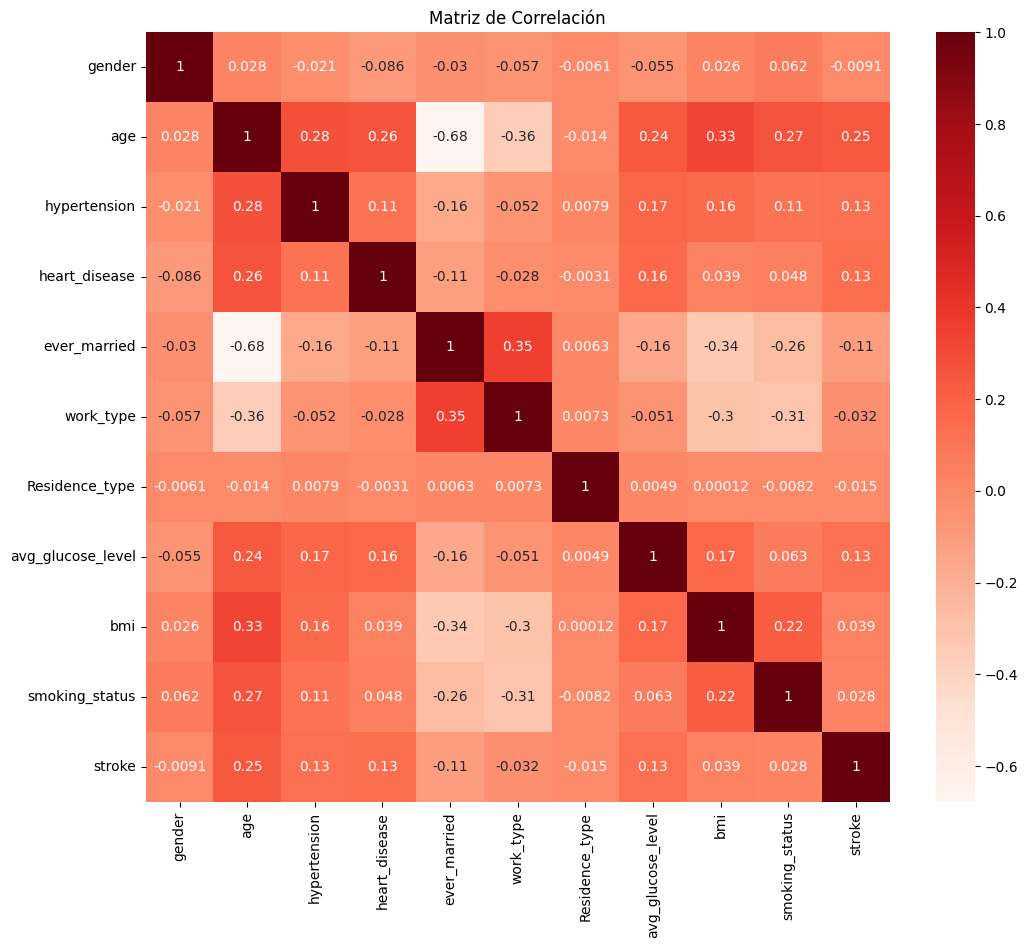

In [ ]:
import seaborn as sns
#Reduccion de la dimensionalidad: Lo hago para determinar si es factible la dimensaionaliad calculando la matriz
# de correlación entre las características y observar si hay características muy correlacionadas.
plt.figure(figsize=(12,10))
cor = df_nuevo.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Correlación con la variable target
cor_target = abs(cor["stroke"])
# ¿Cuáles son las variables que más correlacionadas están?
relevant_features = cor_target[cor_target > 0.5]
relevant_features

stroke    1.0
Name: stroke, dtype: float64

Una de las premisas importantes de la regresión lineal es el hecho de que las variables que usemos no han de estar correlaccionadas, en caso de que si lo estén nos quedaremos solamente con una de ellas. Ya que si estan relaccionadas serían dependientes. Decimos que dos variables están correlacionadas si superan el umbral de 0.5, por lo tanto en este caso no hay correlación ya que ninguna de ellas supera ese limite.

A continuación aplico Recursive feature elimination (RFE), con este metodo ordenamos aquellas columnas que sean más importantes mediante un ranking.


### RFE RECURSIVE FEATURE ELIMINATION

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Escalar y normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Realizar una regresión lineal  y
# reduccion de la dimensionalidad para verificar las columnas mas optimas
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)
model.score(X_test_rfe, y_test)

0.08188929169001213

Aplicamos el modelo de Regresión Lineal y nos devuelve: con un 1 las 5 columnas mas importantes(el numero de columnas importantes que he elegido es 5)

Esto nos puede servir como modelo inicial ya que tenemos que averiguar cual es el numero de columnas optimo para conseguir el mejor accuracy

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True False False  True False False]
[6 1 1 1 1 3 4 1 2 5]


Busco el numero de columnas óptimo

In [ ]:
# nº de features
high_score = 0
# Variable para almacenar las características óptimas
nof = 0
score_list = []
for n in range(1, len(X.columns)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = n
print("Optimum number of features: %d" %nof)
print("Score (R2) with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score (R2) with 9 features: 0.087105


In [ ]:
score_list

[0.017091833090216002,
 0.03628363241659727,
 0.045529421440024365,
 0.045805837736103694,
 0.045938704602190406,
 0.045946188408686806,
 0.08611799772304629,
 0.08615445298523128,
 0.08710461220524601]

Con este código lo se pretende conseguir es averiguar cuántas columnas debo poner. Lo hago probándolos todos para poder saber cuál nos da una accuracy mejor. A partir de ello, y una vez encontrado el número de columnas óptimo, cambiamos el código; en lugar de 5 pondremos lo que nos ha dado es 9 como valor óptimo. Nos devuelve los 9 mejores features

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=9)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

In [ ]:
selected_features_rfe

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'bmi', 'smoking_status'],
      dtype='object')

Para comparar con la seleccion total de Features usamos el R2.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print("Score (R2) with all the features", score)

Score (R2) with all the features 0.08572796424179241


### MÉTODO RIDGE

Voy a probar hacer lo mismo con el metodo Ridge, este algoritmo se centra en penalizar ciertos componentes del modelo para que no hagan overfitting. Por lo tanto hace una seleccion de variables más importantes durante el *entrenamiento*

Ridge ha escogido 10 variables y ha eliminado otras 0 variables
Residence_type      -0.005537
smoking_status      -0.004327
bmi                 -0.000950
gender              -0.000470
avg_glucose_level    0.000322
age                  0.002695
work_type            0.006455
ever_married         0.036338
hypertension         0.038927
heart_disease        0.051218
dtype: float64


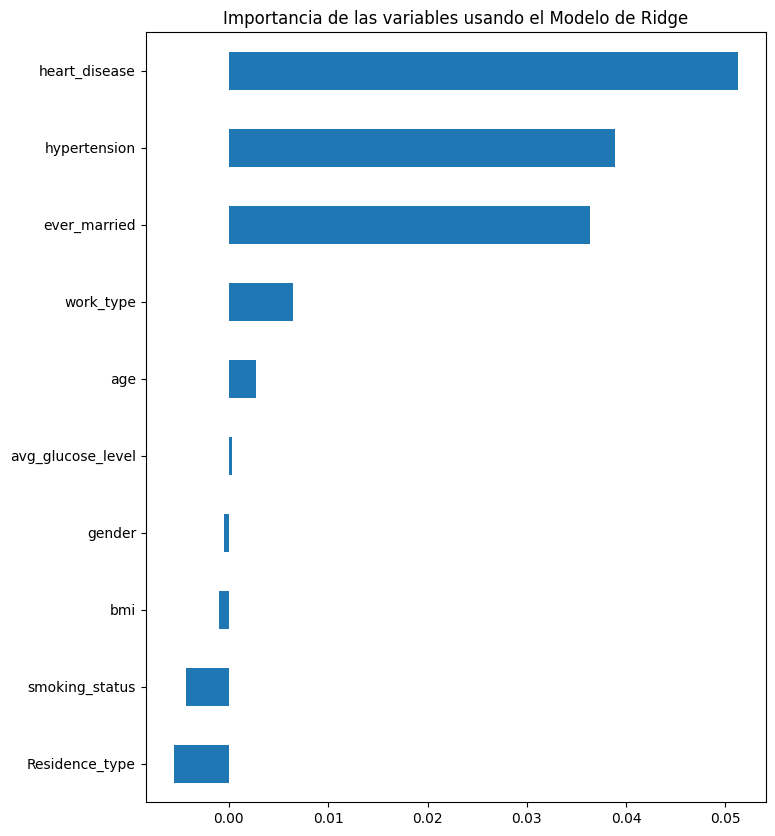

In [ ]:
reg = RidgeCV(alphas=(0.1, 1.0, 10.0))
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)

print("Ridge ha escogido " + str(sum(abs(coef) != 0)) + " variables y ha eliminado otras " +  str(sum(abs(coef) == 0)) + " variables")

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Ridge")

print(imp_coef)

En el resultado se observa que el modelo de Ridge ha seleccionado 10 variables y no ha eliminado ninguna. Además, se muestran los coeficientes estimados para cada variable, ordenados de menor a mayor importancia. Las características con coeficientes más grandes (positivos o negativos) tienen un impacto más significativo en el modelo.

En conclusión es posible que el conjunto de datos no sea tan complejo como para requerir la eliminación de características durante la regularización. La falta de eliminación de variables sugiere que el modelo puede adaptarse bien al conjunto de datos completo sin necesidad de reducir la dimensionalidad. Es decir, todas las variables incluidas son importantes para la predicción de la variable objetivo.

# CLUSTERING

Realizo clustering sobre las caracteristicas 'age', 'avg_glucose_level', 'bmi'. A continuación el codigo:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-79-323f08dee858>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], cmap='viridis')


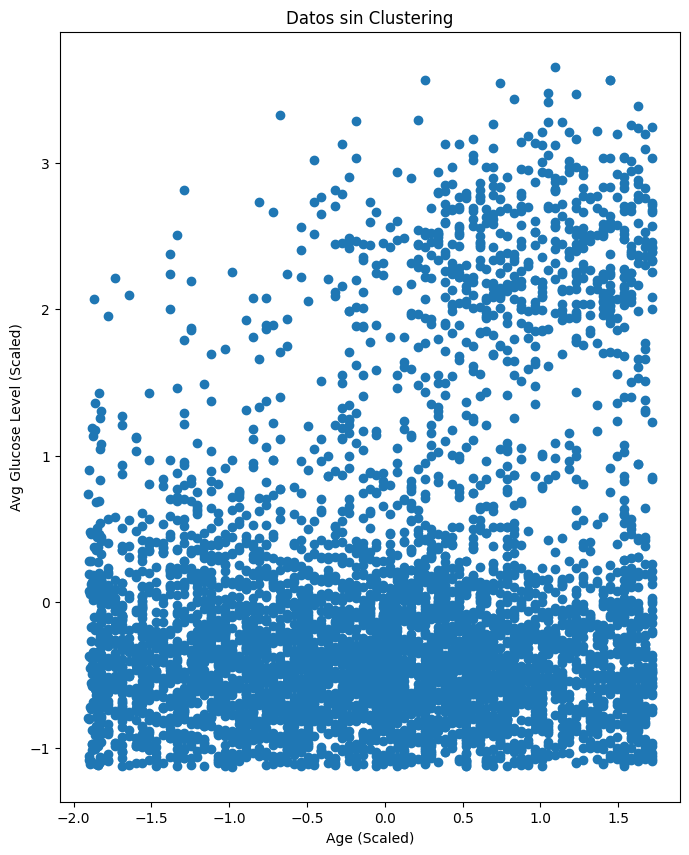

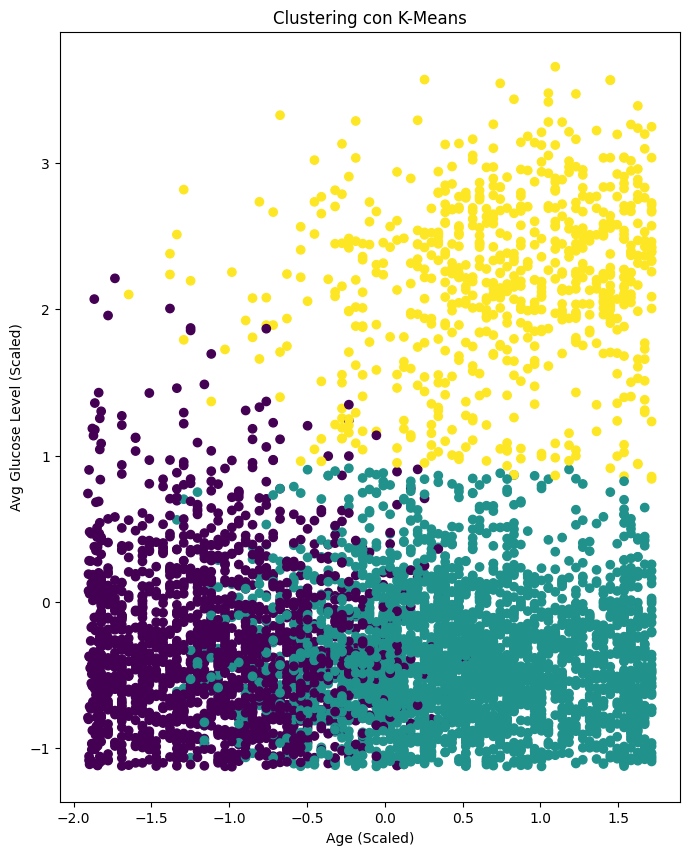

In [ ]:
X2 = df_nuevo[['age', 'avg_glucose_level', 'bmi']]

# Escalado de características
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Entrenamiento del modelo de clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)  # Puedes ajustar el número de clusters según tus necesidades
clusters = kmeans.fit_predict(X2_scaled)

# Visualización de los datos sin cluster
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], cmap='viridis')
plt.xlabel('Age (Scaled)')
plt.ylabel('Avg Glucose Level (Scaled)')
plt.title('Datos sin Clustering')
plt.show()

# Visualización de los clusters en un diagrama de dispersión
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age (Scaled)')
plt.ylabel('Avg Glucose Level (Scaled)')
plt.title('Clustering con K-Means')
plt.show()


Para verificar si el numero de cluster es adecuado, uso el metodo Elbow (metodo codo), con este metodo determino el número óptimo de clusters.

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X2_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

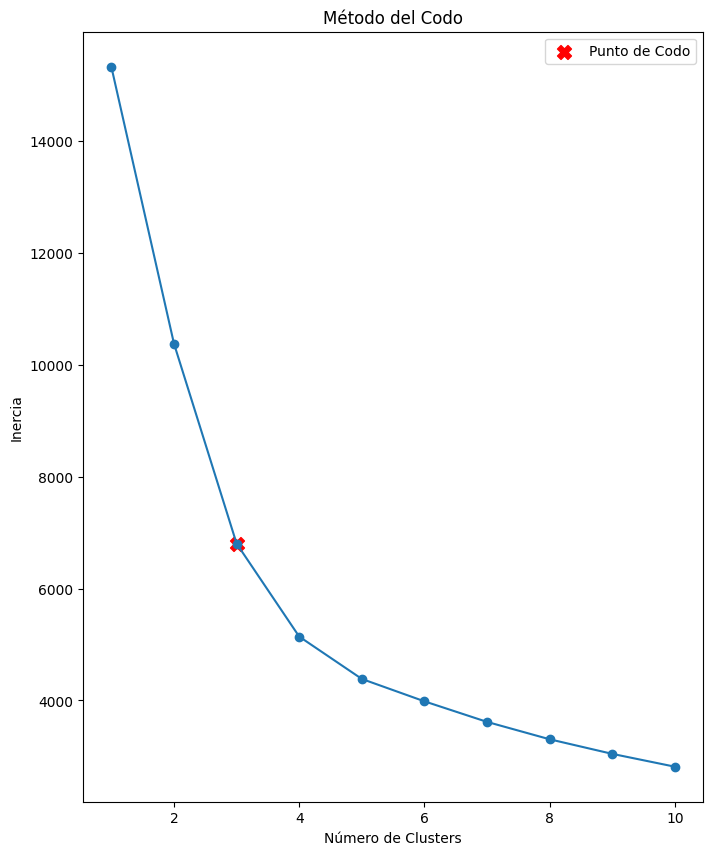

In [ ]:
# Visualización del método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.scatter(x=3, y=inertia[2], color='red', marker='X', s=100, label='Punto de Codo')
plt.legend()
plt.show()

Calculando el punto codo observamos que el numero de clusters óptimo es 3, por lo tanto, eligo 3 clusters basandonos en este metodo.

# REGRESIÓN LOGISTICA

A continuación realizaré una regresión logistica que se adaptará más correctamente al target que se intenta predecir.

In [ ]:
# Entrenamiento del modelo de regresion logistica
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predicción sobre el conjunto de pruebas
y_pred_logistic = clf.predict(X_test_scaled)


In [ ]:
# Calculo del accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Regresión Logística - Exactitud:", accuracy_logistic)

Regresión Logística - Exactitud: 0.9374021909233177


In [ ]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[1198    0]
 [  80    0]]


Los resultados de la regresión logística arrojan una alta precisión general del modelo (0.937), lo que significa que el 93.7% de las predicciones son correctas en el conjunto de prueba. Si observamos el reporte de clasificación con más detalle, podemos ver que el modelo realmente tiene un buen desempeño en la clasificación de la clase negativa (0), con una precisión de 94% y un recall de 100%. Esto significa que de todos los casos que el modelo predice como no accidente cerebrovasculares, el 94% de ellos en realidad no son accidentes cerebrovasculares y 100% de ellos se identifican correctamente de todos los casos no accidente cerebrovasculares.

En cambio, el modelo no es capaz de realizar ninguna identificación correcta para los casos positivos de accidente cerebrovasculares (clase 1).La precisión, recall y la f1-score para la clase 1 son todos iguales a cero, lo que indica que el modelo no predice correctamente ningún caso de accidente cerebrovascular y no tiene el poder de distinguirlos de los casos negativos.Esto también se refleja en la matriz de confusión, donde ningún caso positivo de accidente cerebrovascular (clase 1) es clasificado correctamente como tal, con el resultado de 80 falsos negativos.

En resumen, aunque el modelo tiene una precisión general alta, no es útil para predecir casos de accidente cerebrovascular, ya que no es capaz de capturar ninguna instancia positiva. Para mejorar y solventar este problema, voy a realizar un balanceo de clases para mejorar los resultados del modelo.


# METRICAS

Realizo el cálculo de algunas de las metricas para evaluar el rendimiendo de nuestro modelo de regresión logistica. Antes de realizar el balanceo de clases y poder mejorar los reultados del modelo

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Cálculo de la exactitud del modelo
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Cálculo precision
precision = precision_score(y_test, y_pred_logistic)
# Cálculo recall
recall = recall_score(y_test, y_pred_logistic)
# Cálculo F1-score
f1 = f1_score(y_test, y_pred_logistic)
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Imprimir las métricas
print("Regresión Logística - Exactitud:", accuracy_logistic)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de Confusión:")
print(conf_matrix)

# Informe datos
print(classification_report(y_test, y_pred_logistic))

Regresión Logística - Exactitud: 0.9374021909233177
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Matriz de Confusión:
[[1198    0]
 [  80    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Aplico SMOTE para realizar el balanceo de las clases:

In [ ]:
from imblearn.over_sampling import SMOTE
# Aplico SMOTE para el balanceo de las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Entrenamiento con los datos balanceados
clf2 = LogisticRegression(random_state=42)
clf2.fit(X_resampled, y_resampled)
# Predicción con el conjunto de pruebas
y_pred_logistic2 = clf2.predict(X_test_scaled)

# Cálculo de la excatitud del modelo
accuracy2 = accuracy_score(y_test, y_pred_logistic2)
# Cálculo precision
precision2 = precision_score(y_test, y_pred_logistic2)
# Cálculo recall
recall2 = recall_score(y_test, y_pred_logistic2)
# Cálculo F1-score
f1_2 = f1_score(y_test, y_pred_logistic2)
# Matriz de confusión
conf_matrix2 = confusion_matrix(y_test, y_pred_logistic2)

# Imprimir las métricas
print("Regresión Logística - Exactitud:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_2)
print("Matriz de Confusión:")
print(conf_matrix2)

# Informe de clasificación
print(classification_report(y_test, y_pred_logistic2))


Regresión Logística - Exactitud: 0.755868544600939
Precision: 0.16473988439306358
Recall: 0.7125
F1-score: 0.26760563380281693
Matriz de Confusión:
[[909 289]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1198
           1       0.16      0.71      0.27        80

    accuracy                           0.76      1278
   macro avg       0.57      0.74      0.56      1278
weighted avg       0.92      0.76      0.82      1278



Tras el balanceo de clases se ha conseguido mejorar los resultados obtenidos por nuestro modelo. Pese a que la exactitud del modelo ha bajado del 93.7% a 75.6% se ha mejorado metricas importantes para nuestro caso, como por ejemplo el recall (de 0% al 0.71%) se trata un cambio importante ya que en un problema de detección de enfermedades, el recall puede ser una de las métricas más importantes puesto que es principal identificar todos los casos positivos. Por lo tanto, el modelo ahora es capaz de identificar correctamente el 71% de todos los casos positivios de accidente cerebrovascular en el conjunto de prueba. A su vez, la precisión de la clase 1 (accidente cerebrovascular) ha aumentado de 0 a 16%, esto quiere decir que de todas las instancias que predice el modelo, el 16% son realmente positivas.
En resumen, realizando el balanceo de clases se ha mejorado la capacidad del modelo para identificar correctamente los casos positivos de accidente cerebrovascular (clase 1), como podemos observar con el incremento del porcentaje en el recall y la precisión. Por otro lado, aún existe capacidad de mejora, ya que el modelo aun tiene baja precisión y exactitud.


# EXPLICABILIDAD

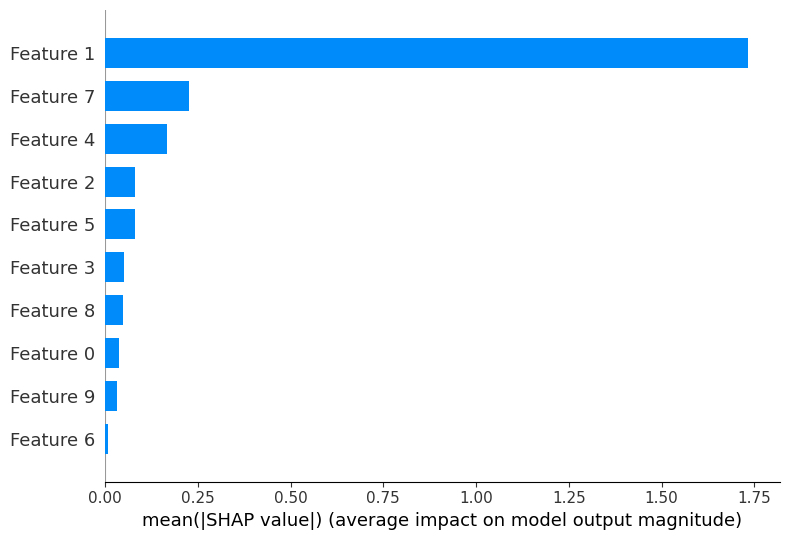

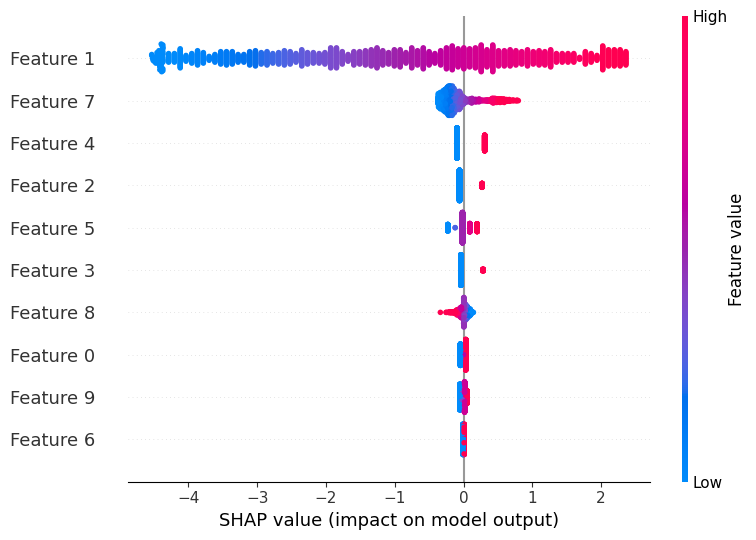

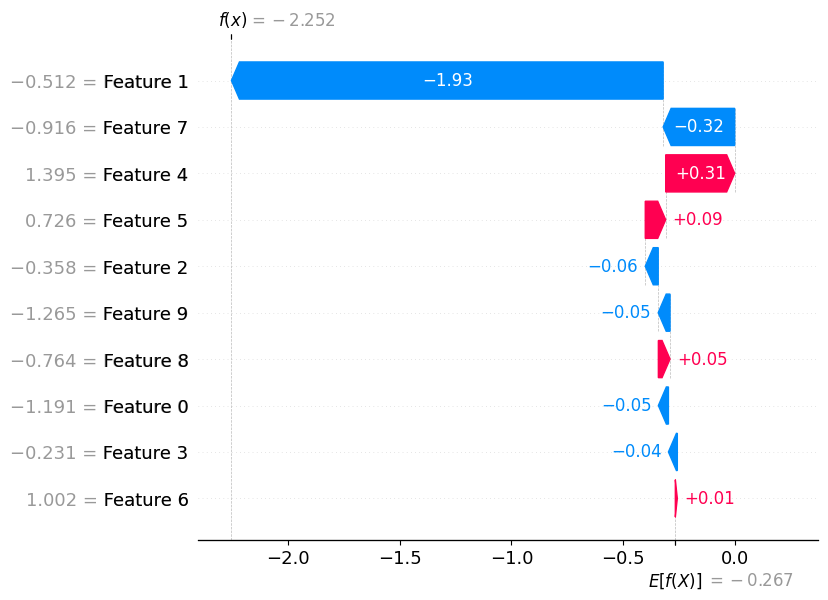

In [ ]:
import shap

# Crear un objeto Explainer para el modelo de regresión logística
explainer = shap.Explainer(clf2, X_resampled)

# Calcular los valores SHAP para todas las muestras de prueba
shap_values = explainer(X_test_scaled)

# Resumen global de las contribuciones de las características
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

# Diagrama de dispersión de SHAP para una observación específica
shap.summary_plot(shap_values, X_test_scaled)

# Gráfico de cascada de SHAP para una muestra específica
shap.waterfall_plot(shap_values[0], max_display=len(X.columns))


Tras observar los graficos, se puede observar que la caracteristica 1 , tiene claramente una mayor contribución positiva a las predicciones del modelo, es decir tiene un mayor impacto en aumentar las predicciónes del modelo.